In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

# t-SNE

<a href="http://lvdmaaten.github.io/tsne/">Страница на сайте автора</a>

<a href="https://cran.r-project.org/web/packages/tsne/tsne.pdf">Реализация в R</a>

Реализация в sklearn:
<a href="http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html">`sklearn.manifold.TSNE`</a>`(n_components=2, perplexity=30, ...)`

* `n_components` --- число компонент;
* `perplexity` --- перплексия (сглаженный показатель эффективного числа соседей);

Методы:
* `fit_transforn(X)` --- обучиться на данных `X` и вернуть сжатое представление `X`.


### Примеры использования метода t-SNE

Генерация выборки размера 500 из пяти "облаков" (гауссовских выборок) в 10-мерном пространстве.

In [2]:
X, y = make_blobs(n_samples=500, n_features=10, centers=5)

Простое применение t-SNE для сжатия в пространство размерности 2.

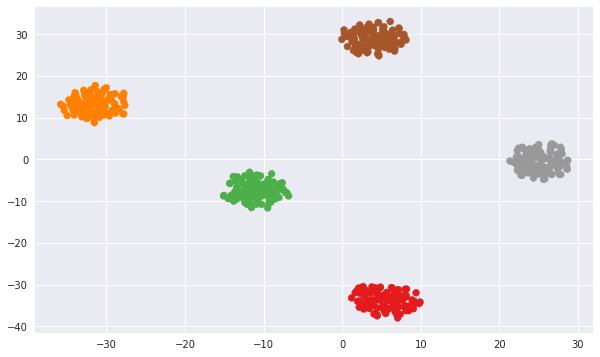

In [3]:
tsne = TSNE(n_components=2)
X_hat = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y, cmap='Set1')
plt.show()

Посмотрим, как меняется расположение точек в двумерном пространстве в зависимости от значения перплексии (сглаженный показатель эффективного числа соседей).

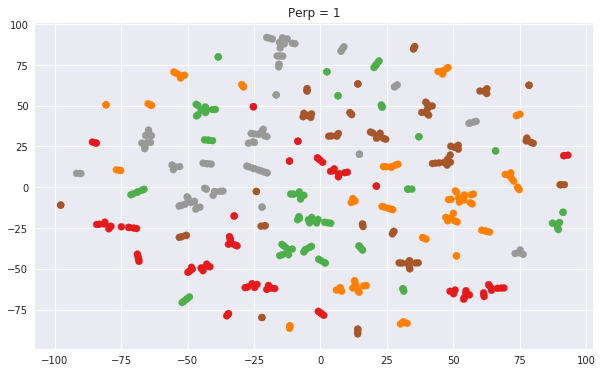

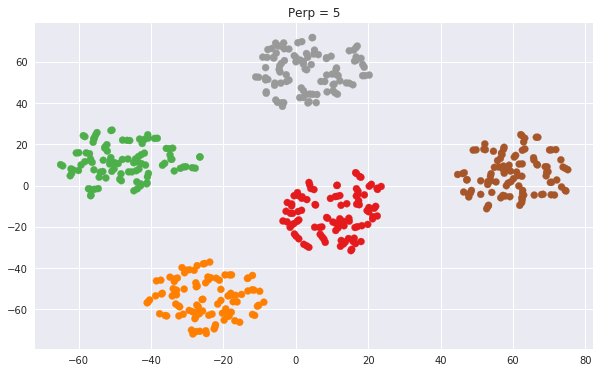

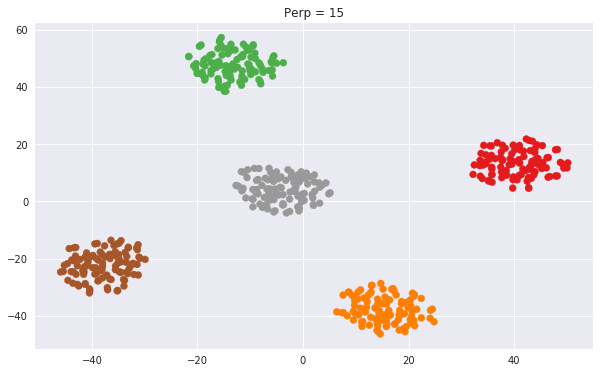

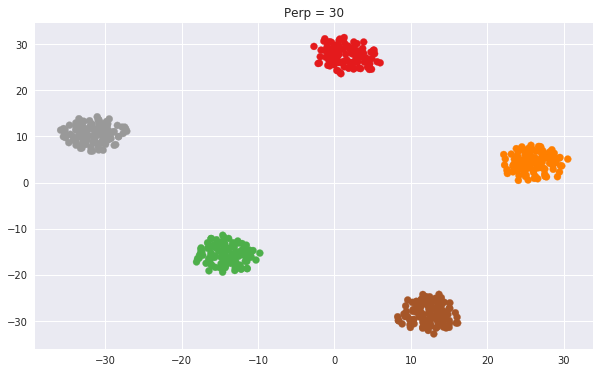

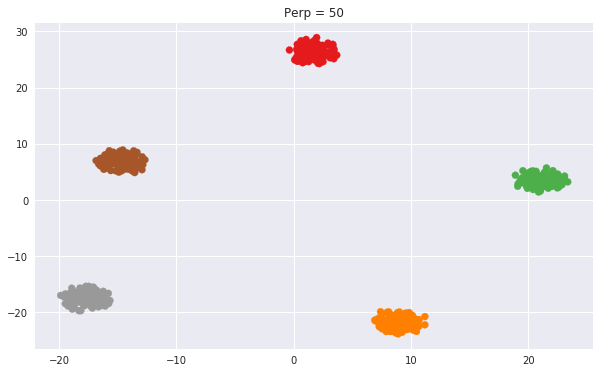

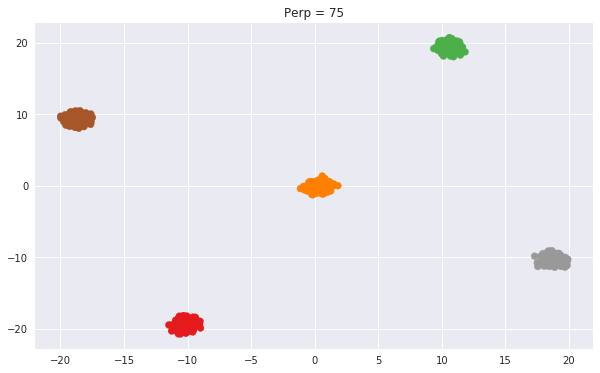

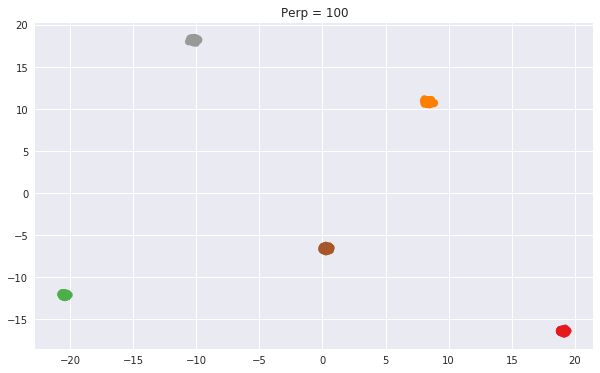

In [4]:
for perplexity in [1, 5, 15, 30, 50, 75, 100]:

    tsne = TSNE(n_components=2, perplexity=perplexity)
    X_hat = tsne.fit_transform(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y, cmap='Set1')
    plt.title('Perp = {}'.format(perplexity))
    plt.show()

Как видим, чем меньше перплексия, тем более картинка получается размытой.
Это происходит из-за того, что с уменьшением перплексии уменьшаются величины $\sigma_i$, отвечающие за дисперсию.
При малом значении перплексии на расположение точки в маломерном пространстве влияют только самые ближайшие соседи.

Если же увеличить дисперсию "облаков", то картинка станет хуже при том же значении перплексии (30).

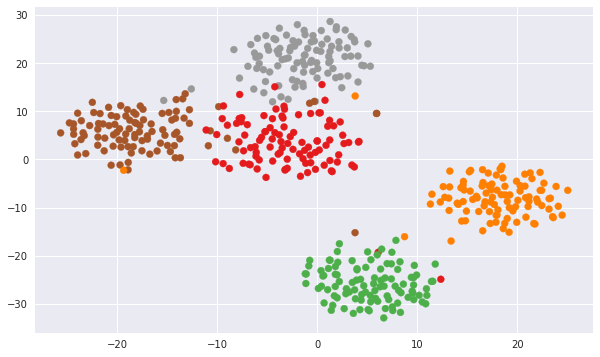

In [5]:
X, y = make_blobs(n_samples=500, n_features=10, centers=5, cluster_std=5)

tsne = TSNE(n_components=2)
X_hat = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=y, cmap='Set1')
plt.show()

## MNIST
Загрузим часть обычного MNIST'а

In [ ]:
X = np.loadtxt('train.txt')
labels = np.loadtxt('train_labels.txt')

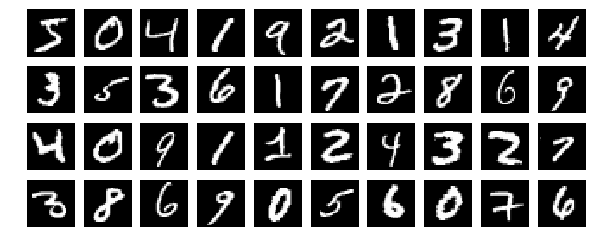

In [7]:
plt.figure(figsize=(10, 4))
for i in range(40):
    plt.subplot(4, 10, i + 1)
    plt.imshow(X[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

Применим к нему сначала PCA для сжатия в пространство размерности 30, а затем t-SNE для сжатия в двумерное пространство.

In [8]:
%%time
pca = PCA(n_components=30)
Y = pca.fit_transform(X)

CPU times: user 11.8 s, sys: 3.2 s, total: 15 s
Wall time: 5.11 s


Доля дисперсии данных, которую они могут объяснить

In [9]:
pca.explained_variance_ratio_.sum()

0.730539514069253

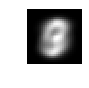

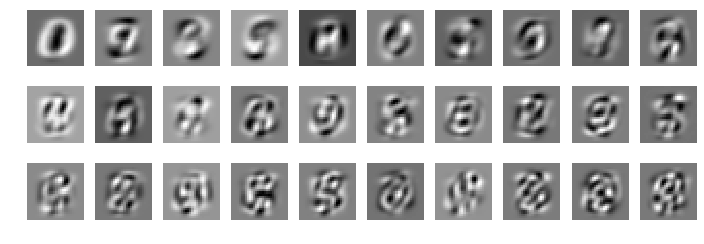

In [10]:
plt.figure(figsize=(1, 1))
plt.imshow(pca.mean_.reshape((28, 28)), cmap='gray')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 4))    
for i in range(30):
    plt.subplot(3, 10, i + 1)
    plt.imshow(pca.components_[i].reshape((28, 28)), cmap='gray')
    plt.axis('off')

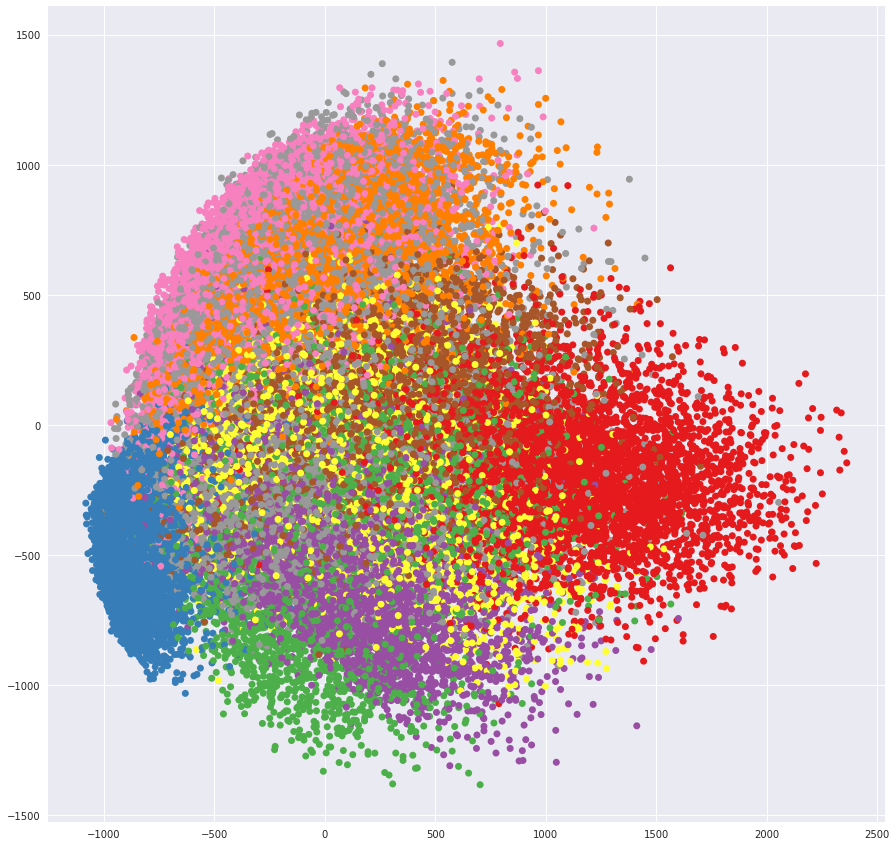

In [11]:
plt.figure(figsize=(15, 15))
plt.scatter(Y[:, 0], Y[:, 1], c=labels, linewidths=0, cmap='Set1')
plt.show()

In [6]:
%%time
tsne = TSNE(n_components=2, perplexity=40)
Z = tsne.fit_transform(Y)

CPU times: user 27min 6s, sys: 1min 47s, total: 28min 54s
Wall time: 28min 58s


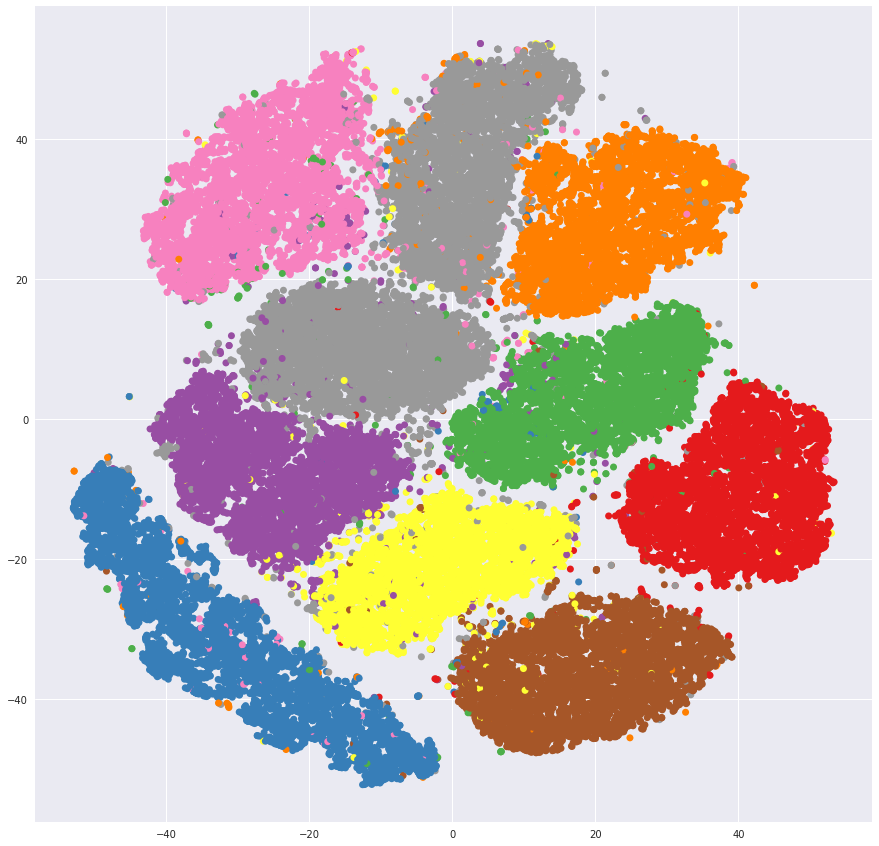

In [7]:
plt.figure(figsize=(15, 15))
plt.scatter(Z[:, 0], Z[:, 1], c=labels, linewidths=0, cmap='Set1')
plt.show()

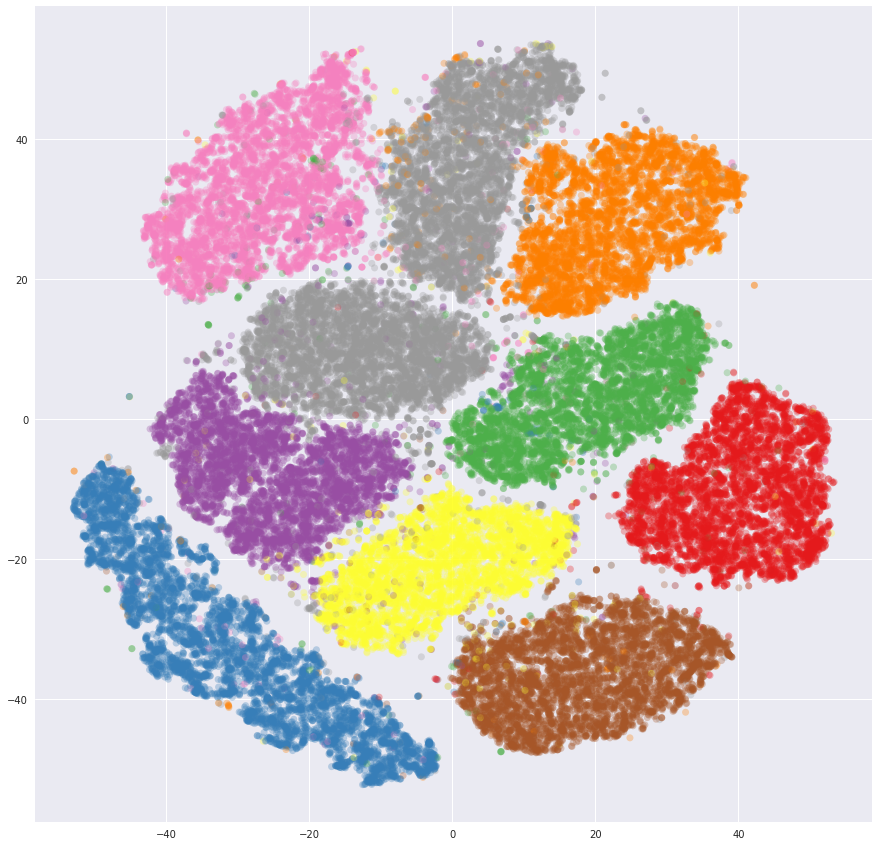

In [10]:
plt.figure(figsize=(15, 15))
plt.scatter(Z[:, 0], Z[:, 1], c=labels, linewidths=0, cmap='Set1', alpha=0.3)
plt.show()

Оригинальная картинка
http://lvdmaaten.github.io/tsne/examples/mnist_tsne.jpg

---------

Прикладная статистика и анализ данных, 2019

Никита Волков

https://mipt-stats.gitlab.io/